<center><h1>Assignment 2</h1></center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


### (i) Perform data pre-processing steps on the dataset. Handle missing values (if any), explore the correlation between variables, and identify any potential outliers.

In [2]:
data =pd.read_csv("ENB2012_data.csv")

df= pd.DataFrame(data)

data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [4]:
data.isna().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [5]:
data.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

##### As we can see there are no missing values so no need to drop values

#### Correlation

In [6]:
print("The Correlation plot is :\n")
data.corr()

The Correlation plot is :



,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272,0.634339
X2,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120,-0.672999
X3,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671,0.427117
X4,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.861828,-0.862547
X5,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889431,0.895785
X6,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587,0.014290
X7,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269841,0.207505
X8,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368,0.050525
Y1,6.222722e-01,-6.581202e-01,4.556712e-01,-8.618283e-01,8.894307e-01,-2.586534e-03,2.698410e-01,8.736759e-02,1.000000,0.975862
Y2,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000


##### Through this data we can observe that variables Y1 and Y2 have good correlation with variables X1, X2, X3, X4, X5, X7, 

<Axes: >

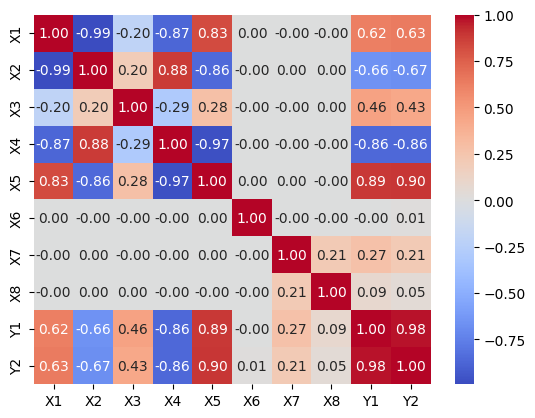

In [7]:
sns.heatmap(data.corr(),annot= True, fmt = ".2f",cmap='coolwarm')

<Axes: >

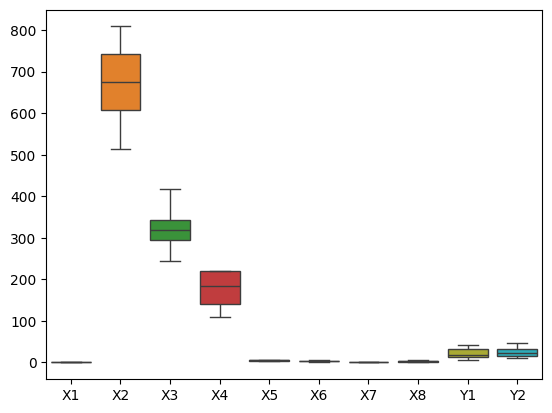

In [8]:
sns.boxplot(data)

##### As we can see, no outliers are detected from boxplots

### (ii) Split the dataset into an 80:20 ratio for training and testing using the sklearn library.

In [9]:
from sklearn.model_selection import train_test_split

x_columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'X7']
y_columns = ['Y1']

x = data[x_columns]
y = data[y_columns]

#x=x.iloc[:,:-1]
#y=y.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print('Shape of x_train :', x_train.shape)
print('Shape of y_train :', y_train.shape)
print('Shape of x_test :', x_test.shape)
print('Shape of y_test :', y_test.shape)

Shape of x_train : (614, 6)
Shape of y_train : (614, 1)
Shape of x_test : (154, 6)
Shape of y_test : (154, 1)


In [10]:
#We need to standardize the data to ensure that larger scales do not effect values

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### (iii) Train a multivariate linear regression model from scratch using numpy, pandas, and matplotlib. Additionally, train a linear regression model using the sklearn library on the training dataset. Also train ridge and lasso regression model using the sklearn library on the training dataset

### (iv) Evaluate the performance for each model on the test dataset using following metrics: R2 score, Mean Squared Error (MSE) and Root Mean Squared Error(RMSE). Compare the performance of the manual model and the sklearn model and plot the predicted vs actual values for both models.

### Multivariable Linear Regression from scratch

##### Equation is Y1 = A1*X1 + A2*X2 + A3*X3 + A4*X4 + A5*X5  + A7*X7  

In [33]:
def linear_regression(x_train ,  y_train):
    
    # Add intercept column to X_train
    x_train_b =  np.c_[np.ones(x_train.shape[0]), x_train]
    
     # Calculate coefficients using the Normal Equation
    theta = np.linalg.inv(x_train_b.T.dot(x_train_b)).dot(x_train_b.T).dot(y_train)
    return theta

# Training the model (from scratch)
theta_manual = linear_regression(x_train_scaled, y_train)
print('Coefficients', theta_manual[1:])
print('\nIntercept', theta_manual[0])


Coefficients [[ -5.87330406]
 [ 12.28922668]
 [ -6.24037382]
 [-19.59140433]
 [  7.18672711]
 [  2.76655453]]

Intercept [22.15503257]


In [34]:
# this is the predicted values
y_pred_manual = np.c_[np.ones(x_test_scaled.shape[0]), x_test_scaled].dot(theta_manual)
print(y_pred_manual)
y_pred_manual.shape


[[19.40236458]
 [14.30201901]
 [31.36290968]
 [35.95791498]
 [15.30424235]
 [28.2063252 ]
 [25.17111191]
 [28.2670108 ]
 [18.40014124]
 [27.59442346]
 [18.40014124]
 [34.94872884]
 [27.59442346]
 [ 7.08431276]
 [18.40014124]
 [38.04462773]
 [38.04462773]
 [10.18021165]
 [14.83590255]
 [34.94872884]
 [34.39812297]
 [35.95791498]
 [11.20612012]
 [29.76611721]
 [12.20834346]
 [29.76611721]
 [33.78622123]
 [34.39812297]
 [15.30424235]
 [16.30646569]
 [ 7.08431276]
 [10.18021165]
 [15.30424235]
 [31.30222409]
 [29.76611721]
 [28.2670108 ]
 [31.36290968]
 [29.76611721]
 [33.78622123]
 [ 8.64410477]
 [28.2670108 ]
 [10.18021165]
 [ 6.58017218]
 [32.28076229]
 [ 7.58239552]
 [ 6.58017218]
 [ 9.14218753]
 [ 8.64410477]
 [29.1848634 ]
 [30.69032235]
 [33.78622123]
 [14.30201901]
 [14.30201901]
 [32.8620161 ]
 [11.74000366]
 [12.20834346]
 [10.18021165]
 [31.30222409]
 [41.14052662]
 [38.04462773]
 [15.83812589]
 [19.40236458]
 [14.30201901]
 [28.2063252 ]
 [28.2670108 ]
 [29.76611721]
 [29.76611

(154, 1)

In [35]:
#y_test=y_test.to_numpy()

res = np.sum((y_pred_manual - y_test)**2)
tot = np.sum((y_pred_manual - y_test.mean())**2)
R_sq_manual = 1 - (res/tot)
mse_manual = np.mean((y_pred_manual - y_test)**2)

print("For Manual Linear Regression\n")

print('Mean Squared Error =', mse_manual)
print('Root Mean Squared Error =', mse_manual**0.5)
print('R-squared Value =', R_sq_manual)


For Manual Linear Regression

Mean Squared Error = 9.560658811669901
Root Mean Squared Error = 3.092031502373464
R-squared Value = 0.905089881791241


### Linear regression using sklearn

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)
LinearRegression()
y_pred_sklearn = lr.predict(x_test_scaled)

In [24]:
lr.coef_

array([[-6.55559442, -3.63863751,  0.79008519, -3.94821951,  7.18672711,
         2.76655453]])

In [25]:
lr.intercept_

array([22.15503257])

In [26]:
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
r2_sklearn = r2_score(y_test, y_pred_sklearn)

print("For Linear Regression with sklearn\n")
print("Mean Squared Error:", mse_sklearn)
print("Root Mean Squared Error", mse_sklearn**0.5)
print("R-Squared Value:", r2_sklearn)

For Linear Regression with sklearn

Mean Squared Error: 9.217858589801482
Root Mean Squared Error 3.036092651715603
R-Squared Value: 0.9115636425685933


### Ridge Regression

In [27]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.2)

#Training
ridge.fit(x_train_scaled, y_train)

#Predicting
y_pred_ridge = ridge.predict(x_test_scaled)

#Finding the goodness of fit
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
R_sq_ridge = r2_score(y_test, y_pred_ridge)
print('Model Coefficients:', ridge.coef_)
print('Model intercept:\n', ridge.intercept_)

print("\nFor Ridge Linear Regression\n")
print('Mean Squared Error =', mse_ridge)
print('Root Mean Squared Error =', mse_ridge**0.5)
print('R-squared Value =', R_sq_ridge)


Model Coefficients: [-6.26808831 -3.44349491  0.83731695 -3.77965752  7.26472515  2.76662195]
Model intercept:
 [22.15503257]

For Ridge Linear Regression

Mean Squared Error = 9.228671133821612
Root Mean Squared Error = 3.0378727975051247
R-squared Value = 0.9114599067607165


### Lasso Regression

In [28]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.2)

#Training
lasso.fit(x_train_scaled, y_train)

#Predicting
y_pred_lasso = lasso.predict(x_test_scaled)

#Finding the goodness of fit
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
R_sq_lasso = r2_score(y_test, y_pred_lasso)
print('Model Coefficients:', lasso.coef_)
print('Model intercept:\n', lasso.intercept_)

print("\nFor Lasso Linear Regression")
print('\nMean Squared Error =', mse_lasso)
print('Root Mean Squared Error =', mse_lasso**0.5)
print('R-squared Value =', R_sq_lasso)

Model Coefficients: [-0.         -0.          2.07853793 -0.          8.16717027  2.58557766]
Model intercept:
 [22.15503257]

For Lasso Linear Regression

Mean Squared Error = 10.048826044335394
Root Mean Squared Error = 3.169988335047212
R-squared Value = 0.9035913207861423


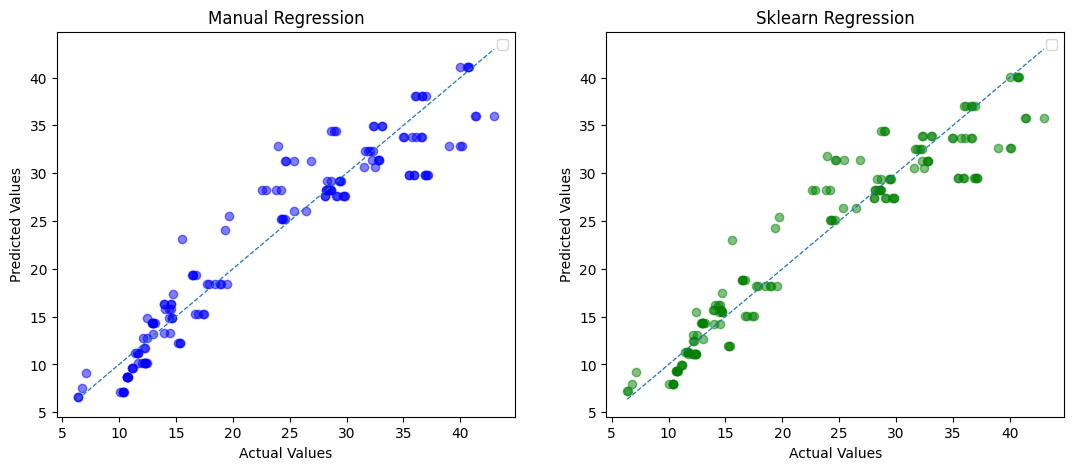

In [29]:
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
plt.scatter(y_test,y_pred_manual,alpha=0.5,c='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', lw=0.9)
plt.title("Manual Regression")
plt.legend()
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(1,2,2)
plt.scatter(y_test,y_pred_sklearn,alpha=0.5,c='green')
plt.title("Sklearn Regression")
plt.legend()
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', lw=0.9)

### V) Propose energy efficiency improvement suggestions based on the insights from the model results, focusing on building design elements that most significantly impact heating load.

##### From the prediction of the models we find out the different feature. Putting the values in the Equation Y1 = A1*X1 + A2*X2 + A3*X3 + A4*X4 + A5*X5  + A7*X7 we can find out the relation between Heating Load (Y1) and the other fetures. The relation between the Heating load and the other factors depends on the magnitute of coefficients and their signs (positive or negative).

##### By observing the coefficients we find out that the heat load has a High Negative coefficient for Relative Compactness (X1).  Thus by increasing relative compactness we can greatly reduce heat load. 

##### We can also observe that Overall Heigh (X5) has a High Positive Coefficient. Therefore we can greatly decrease the Heat Load by decreasing the height.

##### Factors like Surface Area (X2) and Roof Area (X4) also have a Negative Coefficient indicating that by increasing them we can decrease Heating Load

##### Glazing Area (X7) and Wall Area (X3) have a Positive Coefficient indicating that by decreasing them we can decrease Heating Load. The coefficient for Wall Area (X3) is very small, thus it will have a very minute effect on Heating Load